In [416]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [417]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [419]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [421]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [422]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [423]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [424]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [426]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [427]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [428]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.

In [429]:
# Join Measurement & Station tables
session.query(Measurement.station, Station.station)
same_station = session.query(Measurement, Station).filter(Measurement.station == Station.station)

In [430]:
# Perform a query to retrieve the data and precipitation scores
sel = [Measurement.date,
        Measurement.prcp]
year_precipitation = session.query(*sel).\
    filter(Measurement.date <= '2017-08-23').\
    filter(Measurement.date >= '2016-08-23')

In [431]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df_precipitation = pd.DataFrame(year_precipitation)
df_precipitation.set_index("date", inplace=True)
#df_precipitation

In [432]:
# Sort the dataframe by date
df_prec_by_date = df_precipitation.sort_values(by="date")
df_prec_by_date

,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


In [311]:
# DELETE
# Output to file to see data
df_prec_by_date.to_csv("Resources/precip_by_date.csv", index=True, header=True)

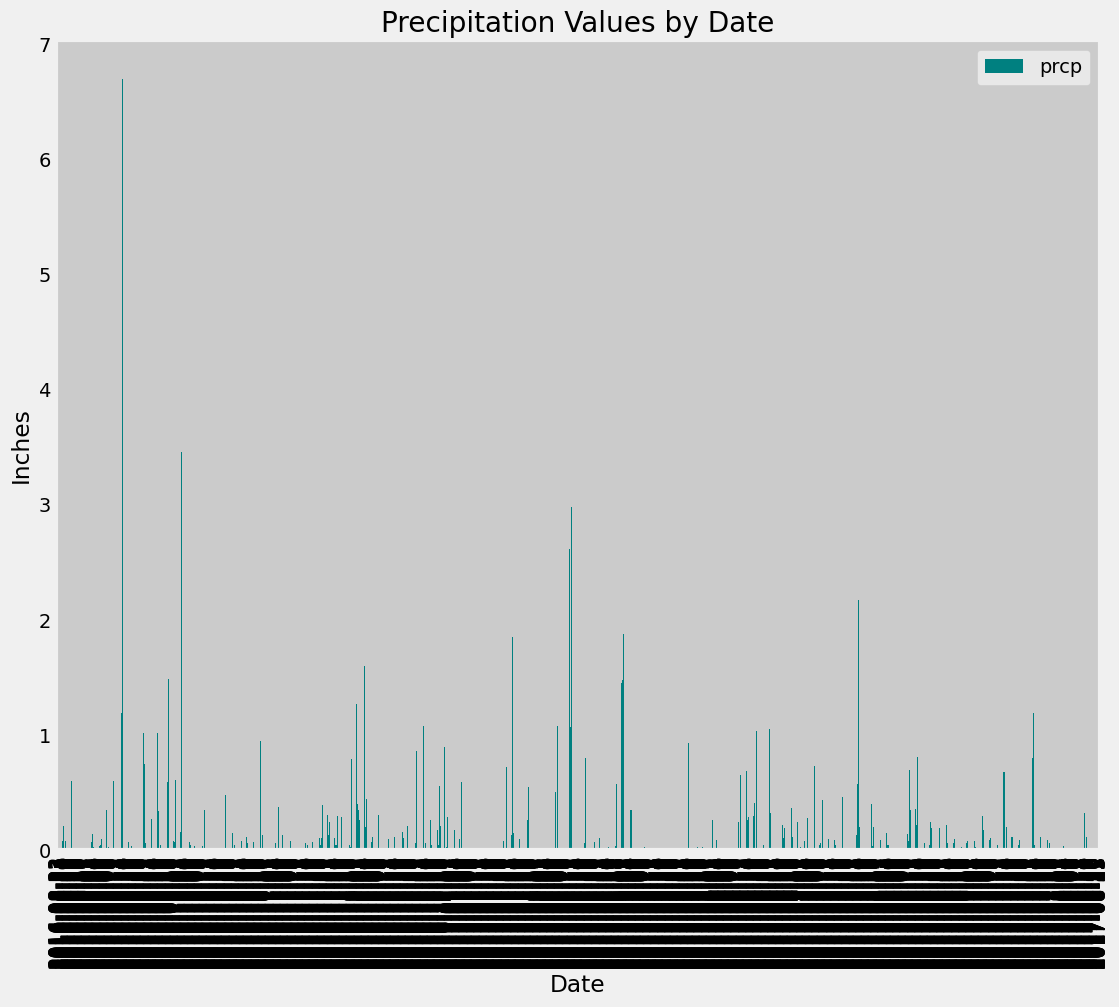

In [312]:
# Use Pandas Plotting with Matplotlib to plot the data
df_prec_by_date.plot(kind="bar", facecolor="teal", figsize=(12,10),
                            title="Precipitation Values by Date",
                            xlabel="Date",
                            ylabel="Inches",
                            legend="Precipitation"
                            #plt.xlim([40])
)
plt.show()

In [313]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_prec_by_date.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [314]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(Station.station).distinct().count()
print(station_count)

9


In [315]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

stations = []

station_activity = session.query(
            Measurement.station,
            func.count(Measurement.station)
            ).group_by(
                Measurement.station
            ).order_by(func.count (Measurement.station).desc())

for station in station_activity:
    stations.append(station)
    
print(stations)



[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [316]:
# Which station id has the highest activity?
## USC00519281 with 2772

In [317]:
# Design a query that calculates the lowest, highest, and average temperatures that filters on the most-active station
# found in the previous query.

low_temp = session.query(
        func.min(Measurement.tobs)
).filter(Measurement.station == "USC00519281").all()


max_temp = session.query(
        func.max(Measurement.tobs)
).filter(Measurement.station == "USC00519281").all()


avg_temp = session.query(
        func.avg(Measurement.tobs)
).filter(Measurement.station == "USC00519281").all()

print(low_temp)
print(max_temp)
print(avg_temp)


[(54.0,)]
[(85.0,)]
[(71.66378066378067,)]


In [433]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

sel = [Measurement.tobs]
most_active_station_query = session.query(*sel).\
    filter(Measurement.date <= '2017-08-23').\
    filter(Measurement.date >= '2016-08-23').\
    filter(Measurement.station == "USC00519281").all()



In [434]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

df_most_active_station = pd.DataFrame(most_active_station_query)
print(df_most_active_station)

     tobs
0    77.0
1    77.0
2    80.0
3    80.0
4    75.0
..    ...
347  77.0
348  77.0
349  76.0
350  76.0
351  79.0

[352 rows x 1 columns]


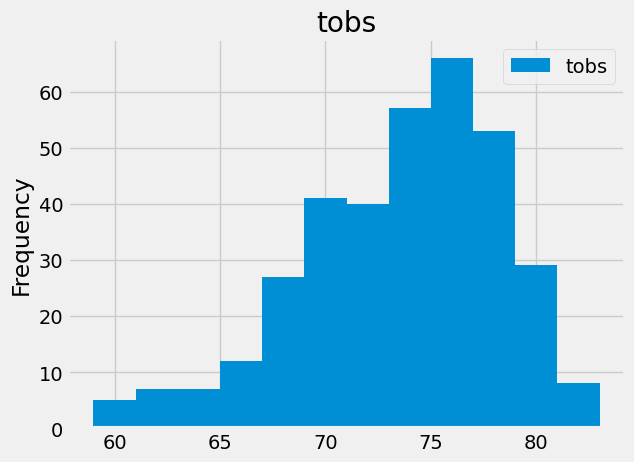

In [435]:
df_most_active_station.hist(bins=12,
                            legend="tobs",
                            )
plt.ylabel("Frequency")
plt.show()

# Close session

In [320]:
# Close Session
session.close()